In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df_origin = pd.read_json("scout_car.json",lines=True)
df = df_origin.copy()
df

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [3]:
df.sample(5).T

,3173,13897,9940,8635,9503
url,https://www.autoscout24.com//offers/audi-a3-sp...,https://www.autoscout24.com//offers/renault-cl...,https://www.autoscout24.com//offers/opel-corsa...,https://www.autoscout24.com//offers/opel-corsa...,https://www.autoscout24.com//offers/opel-corsa...
make_model,Audi A3,Renault Clio,Opel Corsa,Opel Corsa,Opel Corsa
short_description,SPORTBACK 1.6 TDI Business,Sporter 1.2 75CV Zen,1.4 Online Edition Automaat (NAV./AUTOMAAT/NIEUW!,1.2 Neu: TÜV/HU/Inspektion,1.4 66kW (90CV) Selective
body_type,Sedans,Station wagon,Compact,Sedans,Other
price,14450,9490,16999,7550,9500
vat,VAT deductible,None,VAT deductible,Price negotiable,None
km,"135,364 km","40,691 km",10 km,"38,500 km","7,912 km"
registration,05/2016,02/2017,01/2019,03/2016,05/2018
prev_owner,1 previous owner,1 previous owner,None,None,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [5]:
## bazı sütunlar isimlerinde newline karakterler olduğundan dolayı sıkıntılar var

In [6]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [7]:
 df.rename(columns={"\nEntertainment & Media\n":"Entertainment & Media",
                    '\nComfort & Convenience\n':"Comfort & Convenience",
                    "\nExtras\n" : "Extras",
                    '\nSafety & Security\n':"Safety & Security"
                   
                   
                   }).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [8]:
 df.rename(columns={"\nEntertainment & Media\n":"Entertainment & Media",
                    '\nComfort & Convenience\n':"Comfort & Convenience",
                    "\nExtras\n" : "Extras",
                    '\nSafety & Security\n':"Safety & Security"
                   
                   
                   },inplace=True)

In [9]:
df.shape

(15919, 54)

In [10]:
df.isna().sum()        # gerçek NaN'ları ve None'ları verecek garip değerleri değil.

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

Electricity consumption          15782
Last Service Date                15353
Other Fuel Types                 15039
Availability                     15284
Last Timing Belt Service Date    15903
Available from                   15647
kW                               15919                   ## bunlar düşülebilir hemen.

In [11]:
df.isna().sum() / len(df) * 100  

url                               0.000
make_model                        0.000
short_description                 0.289
body_type                         0.377
price                             0.000
vat                              28.350
km                                0.000
registration                      0.000
prev_owner                       42.892
kW                              100.000
hp                                0.000
Type                              0.013
Previous Owners                  41.711
Next Inspection                  77.794
Inspection new                   75.300
Warranty                         34.047
Full Service                     48.395
Non-smoking Vehicle              54.916
null                              0.000
Make                              0.000
Model                             0.000
Offer Number                     19.945
First Registration               10.032
Body Color                        3.750
Paint Type                       36.259


In [12]:
## % 85'den fazla missing value olan sütunlar düşülebilir.

In [13]:
df.drop(labels=["Available from","Last Timing Belt Service Date","Availability","Other Fuel Types","Last Service Date",
               "Electricity consumption","kW"],axis=1).shape

(15919, 47)

In [14]:
df.drop(labels=["Available from","Last Timing Belt Service Date","Availability","Other Fuel Types","Last Service Date",
               "Electricity consumption","kW"],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    15919 non-null  object
 1   make_model             15919 non-null  object
 2   short_description      15873 non-null  object
 3   body_type              15859 non-null  object
 4   price                  15919 non-null  int64 
 5   vat                    11406 non-null  object
 6   km                     15919 non-null  object
 7   registration           15919 non-null  object
 8   prev_owner             9091 non-null   object
 9   hp                     15919 non-null  object
 10  Type                   15917 non-null  object
 11  Previous Owners        9279 non-null   object
 12  Next Inspection        3535 non-null   object
 13  Inspection new         3932 non-null   object
 14  Warranty               10499 non-null  object
 15  Full Service       

In [16]:
 # df.nunique()   # TypeError: unhashable type: 'list  bundan dolayı  str methodlarını daha iyi uygulayabilmem için
                 # listedeki verileri stringe dönüştürmeliyim.

In [17]:
df = df.applymap(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)
df.sample(2)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version
1377,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDI Sportback /Euro6 /Navi /SHZ /PDC,Sedans,14999,VAT deductible,"13,790 km",05/2017,1 previous owner,66 kW,",Used,,Diesel (Particulate Filter)",\n1\n,NaN,"\nYes\n,\n90 g CO2/km (comb)\n","\n,\n,\nEuro 6\n","\n,\n,\n4 (Green)\n","\n,\n",,\nAudi\n,"\n,A1,\n",\n0283N\n,"\n,2017,\n","\n,Black,\n",\nMetallic\n,\nMythosschwarz\n,"\nCloth, Black\n","\n,Sedans,\n",\n5\n,\n4\n,\n0588/BDF\n,"\n,Manual,\n","\n1,422 cc\n",\n3\n,NaN,\nfront\n,"\n,Diesel (Particulate Filter),\n","['3.4 l/100 km (comb)'],['3.9 l/100 km (city)'...",\n90 g CO2/km (comb)\n,\nEuro 6\n,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...","\n,Farbe: Mythosschwarz Metallic,Polster: Stof...",NaN,\n5\n,NaN
15169,https://www.autoscout24.com//offers/renault-es...,Renault Espace,TCe 200 Initiale Paris Energy EDC 147 kW (200,Station wagon,21950,VAT deductible,"79,000 km",05/2016,None,147 kW,",Used,,Super 95",NaN,NaN,NaN,\n12 months\n,NaN,"\n,\n,\n140 g CO2/km (comb)\n",,\nRenault\n,"\n,Espace,\n",\n4944057\n,"\n,2016,\n","\n,White,\n",\nMetallic\n,NaN,"\nFull leather, Grey\n","\n,Station wagon,\n",\n5\n,\n5\n,NaN,"\n,Automatic,\n","\n1,618 cc\n",\n4\n,"\n1,609 kg\n",\nfront\n,"\n,Super 95,\n","['6.2 l/100 km (comb)'],['7.8 l/100 km (city)'...",\n140 g CO2/km (comb)\n,\nEuro 6\n,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",\n353 Euros/mes SIN entrada. Admitimos tu coch...,NaN,\n6\n,NaN


In [18]:
## bazı \n'leri df'den temizleyebiliriz kolayca : 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    15919 non-null  object
 1   make_model             15919 non-null  object
 2   short_description      15873 non-null  object
 3   body_type              15859 non-null  object
 4   price                  15919 non-null  int64 
 5   vat                    11406 non-null  object
 6   km                     15919 non-null  object
 7   registration           15919 non-null  object
 8   prev_owner             9091 non-null   object
 9   hp                     15919 non-null  object
 10  Type                   15917 non-null  object
 11  Previous Owners        9279 non-null   object
 12  Next Inspection        3535 non-null   object
 13  Inspection new         3932 non-null   object
 14  Warranty               10499 non-null  object
 15  Full Service       

In [20]:
df= df.apply(lambda x: x.str.replace("\n","").str.strip(",") if x.dtype == "O" else x)
df.sample(4)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version
6268,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,"K 1,6 CDT SportsTou NAVI,AppleCarplay,EU6",Station wagon,8490,VAT deductible,"166,726 km",10/2016,1 previous owner,81 kW,"Used,,Diesel (Particulate Filter)",1,"08/2020,92 g CO2/km (comb)",NaN,NaN,Euro 6,4 (Green),,Opel,Astra,NaN,2016,Red,Metallic,Lava Rot,"Cloth, Black",Station wagon,4,5,NaN,Manual,"1,598 cc",NaN,NaN,NaN,Diesel (Particulate Filter),"['3.5 l/100 km (comb)'],['4 l/100 km (city)'],...",92 g CO2/km (comb),Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Roof rack,Touch screen","Adaptive Cruise Control,Central door lock,Dayt...","Sonderausstattung:,NAVI,PDC,ApplaCarplay, SHZ,...",NaN,NaN,Germany
2407,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 30 TFSI Black Line S tronic **VIRTUAL**,Sedans,28990,VAT deductible,12 km,04/2019,1 previous owner,85 kW,"Used,,Gasoline",1,NaN,NaN,"24 months,110 g CO2/km (comb)",Euro 6d-TEMP,,,Audi,A1,NaN,2019,White,Metallic,Blanco techo-retrovisor Negro,NaN,Sedans,5,5,NaN,Automatic,999 cc,3,"1,200 kg",NaN,Gasoline,"['4.8 l/100 km (comb)'],['5.9 l/100 km (city)'...",110 g CO2/km (comb),Euro 6d-TEMP,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...","Equipado con:,- ,Cambio automático S-Tronic co...",NaN,7,Spain
14702,https://www.autoscout24.com//offers/renault-cl...,Renault Clio,LIMITED TCe 75 KLIMA,Compact,11400,VAT deductible,150 km,04/2019,1 previous owner,56 kW,"Used,,Super 95",1,"04/2022,113 g CO2/km (comb)",NaN,Euro 6,4 (Green),,,Renault,Clio,GW Nr. 6675,2019,Red,Metallic,Intense-Rot (NPK),"Cloth, Black",Compact,4,5,3333/BAJ,Manual,898 cc,NaN,NaN,NaN,Super 95,"['5 l/100 km (comb)'],['6.3 l/100 km (city)'],...",113 g CO2/km (comb),Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",NaN,"ABS,Central door lock,Daytime running lights,D...","TAGESZULASSUNG - DEUTSCHES FAHRZEUG, inkl. Kom...",NaN,NaN,Germany
11266,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,1.6 CDTI Sports Tourer ecoFLEXStart/Stop Selec...,Station wagon,15900,Price negotiable,"6,120 km",05/2017,1 previous owner,100 kW,"Used,,Diesel",1,NaN,NaN,NaN,104 g CO2/km (comb),Euro 6,,Opel,Insignia,NaN,2017,Silver,Metallic,NaN,NaN,Station wagon,5,5,NaN,Manual,"1,598 cc",4,"1,701 kg",NaN,Diesel,"['3.9 l/100 km (comb)'],['4.6 l/100 km (city)'...",104 g CO2/km (comb),Euro 6,"Air conditioning,Armrest,Cruise control,Electr...",On-board computer,Roof rack,"ABS,Central door lock with remote control,Dayt...","Gebraucht, Kombi, 05/2017, 136 PS (100 kW), Di...",NaN,6,NaN


In [21]:
df.sample(4)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Emission Label,Gears,Country version
641,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDI,Compact,12900,VAT deductible,"105,139 km",07/2016,None,66 kW,"Used,,Diesel (Particulate Filter)",NaN,NaN,NaN,,NaN,NaN,,Audi,A1,11291256,2016,White,Uni/basic,Bianco,NaN,Compact,3,4,NaN,Manual,"1,422 cc",3,"1,165 kg",front,Diesel (Particulate Filter),"['3.6 l/100 km (comb)'],['4.1 l/100 km (city)'...",94 g CO2/km (comb),Euro 6,"Air conditioning,Power windows",Radio,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",PREZZO VERO: NESSUN OBBLIGO DI FINANZIAMENTO O...,NaN,5,NaN
11797,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,INNOVATION 1.6 CDTI 136 CV AT,Station wagon,22500,VAT deductible,"25,660 km",04/2018,None,100 kW,"Employee's car,,Diesel (Particulate Filter)",NaN,NaN,NaN,NaN,NaN,NaN,,Opel,Insignia,NaN,2018,Blue,Metallic,DARK MOON BLUE,NaN,Station wagon,5,5,NaN,Automatic,"1,598 cc",4,"1,585 kg",front,Diesel (Particulate Filter),"['5.2 l/100 km (comb)'],['6.8 l/100 km (city)'...",137 g CO2/km (comb),Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...","PREZZO ESCLUSO DI PASSAGGIO DI PROPRIETA',POSS...",NaN,6,Italy
12735,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,Edition,Station wagon,27980,None,"1,108 km",05/2019,None,121 kW,"Demonstration,,Gasoline",NaN,05/2022,NaN,NaN,NaN,NaN,,Opel,Insignia,47318,2019,Black,NaN,Onyx Schwarz,Cloth,Station wagon,5,5,NaN,Manual,"1,490 cc",NaN,NaN,front,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,", Standort Enns, Tel. 07223/83233, KfzID 4731...",NaN,5,NaN
2740,https://www.autoscout24.com//offers/audi-a3-li...,Audi A3,Limousine 1.4 TFSI Navi Xenon PDC Tempomat,Sedans,17410,VAT deductible,"100,600 km",02/2016,1 previous owner,92 kW,"Used,,Regular/Benzine 91",1,"03/2019,126 g CO2/km (comb)",NaN,Euro 6,4 (Green),,,Audi,A3,06707,2016,Silver,Metallic,L5 Florettsilber Metallic,"Cloth, Black",Sedans,5,5,0588/AWX,Automatic,"1,395 cc",4,NaN,front,Regular/Benzine 91,"['5.3 l/100 km (comb)'],['6.7 l/100 km (city)'...",126 g CO2/km (comb),Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...","Technik & Sicherheit:,Climatronic mit Stauluft...",NaN,NaN,Germany


In [22]:
df.nunique()

url                      15919
make_model                   9
short_description        10001
body_type                    9
price                     2956
vat                          2
km                        6690
registration                48
prev_owner                   4
hp                          81
Type                       169
Previous Owners            101
Next Inspection           1384
Inspection new             201
Warranty                   506
Full Service               121
Non-smoking Vehicle         93
null                         1
Make                         3
Model                        9
Offer Number             11440
First Registration           4
Body Color                  14
Paint Type                   3
Body Color Original       1927
Upholstery                  46
Body                         9
Nr. of Doors                 6
Nr. of Seats                 6
Model Code                 232
Gearing Type                 3
Displacement                77
Cylinder

In [23]:
# df.isin("").sum()

In [24]:
df.isin([""]).sum()   # hangi sütunlarda kaçar tane boş satır var yani bu satırlar da hiçbir şey yok : 

url                          0
make_model                   0
short_description            0
body_type                    0
price                        0
vat                          0
km                           0
registration                 0
prev_owner                   0
hp                           0
Type                         0
Previous Owners              0
Next Inspection              0
Inspection new               0
Warranty                  1343
Full Service              1985
Non-smoking Vehicle       3717
null                     15919
Make                         0
Model                        0
Offer Number                 0
First Registration           0
Body Color                   0
Paint Type                   0
Body Color Original          0
Upholstery                   0
Body                         0
Nr. of Doors                 0
Nr. of Seats                 0
Model Code                   0
Gearing Type                 0
Displacement                 0
Cylinder

In [25]:
## aslında bu bizim için NaN demek. O yüzden ; 

In [26]:
df[df.isin([""])] = np.nan

### url

In [27]:
df["url"].value_counts()

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [28]:
## bunun bize yararlı olmayacağını düşünüyorum.

In [29]:
df.drop("url",axis=1,inplace=True)

### make_model

In [30]:
df["make_model"].value_counts(dropna=False)  
## tam ve düzgün bir feature  gibi belki marka / model diye 2 farklı sütun yapılabilir.

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

###  Make

In [31]:
df["Make"].value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [32]:
df["Make"].value_counts(normalize=True)

Opel      0.461
Audi      0.359
Renault   0.180
Name: Make, dtype: float64

###  Model 

In [33]:
df["Model"]

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [34]:
df["Model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [35]:
df.drop(["Model","Make"],axis=1,inplace=True)  

In [36]:
df.shape

(15919, 44)

###  short_description

In [37]:
df.short_description.value_counts(dropna=False) 

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [38]:
## arabalarla ilgili kısa bilgiler içeriyor belki ileride yardımcı olabilir missing_value konusunda o yüzden şimdilik düşmüyorum

### description    

In [39]:
df["description"].astype("str").value_counts(dropna=False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [40]:
## short description gibi bu da belki lazım olabilir.şimdilik tutuyorum.

###  body_type 

In [41]:
df["body_type"].value_counts(dropna=False)    # 60 tane orijinal NaN değerimiz var,sağında solunda temizlenecek bir şey yok
                                              # 290 tane other var.

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### Body

In [42]:
df["Body"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

In [43]:
df[["Body","body_type"]].sample(4)

,Body,body_type
14701,Station wagon,Station wagon
9182,Sedans,Sedans
12069,Sedans,Sedans
9555,Compact,Compact


In [44]:
## body_type ile aynı sütunlara ve değerlere sahip olduğundan dolayı bunu bırakacağız.

In [45]:
df.drop(["Body"],axis=1,inplace=True)

In [46]:
df.shape

(15919, 43)

### vat

VAT deductible : geri talep edilebilir KDV
Price negotiable : Pazarlık edilebilir fiyat

In [47]:
df["vat"].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [48]:
df["vat"].value_counts(normalize=True,dropna=False)

VAT deductible     0.690
NaN                0.283
Price negotiable   0.027
Name: vat, dtype: float64

In [49]:
## bu sütunda extra temizlenecek bir şey yok ve 4513 tane NaN var.

### km    

In [50]:
df["km"].value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [51]:
df["km"].sample(5)

10435          1 km
631       36,621 km
6952     124,112 km
5083          35 km
3055      53,262 km
Name: km, dtype: object

In [52]:
# df["km"].str.replace("km","").str.replace(",","").astype("float")

In [53]:
df["km"].str.replace("km","").str.replace(",","").replace("- ",np.nan).astype("float")

0       56013.000
1       80000.000
2       83450.000
3       73000.000
4       16200.000
           ...   
15914         NaN
15915    9900.000
15916      15.000
15917      10.000
15918         NaN
Name: km, Length: 15919, dtype: float64

In [54]:
df["km"] = df["km"].str.replace("km","").str.replace(",","").replace("- ",np.nan).astype("float")

In [55]:
df.km.value_counts(dropna=False).sort_values(ascending=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
36980.000       1
36818.000       1
46398.000       1
59535.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

In [56]:
df["km"]

0       56013.000
1       80000.000
2       83450.000
3       73000.000
4       16200.000
           ...   
15914         NaN
15915    9900.000
15916      15.000
15917      10.000
15918         NaN
Name: km, Length: 15919, dtype: float64

In [57]:
## NaN  sayısı 1024  

###  registration : ruhsatın verildiği tarih 

In [58]:
df["registration"].value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

### First Registration

In [59]:
df["First Registration"].value_counts(dropna=False)

2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: First Registration, dtype: int64

In [60]:
# bu iki sütun ruhsat ile ilgili olduğundan arabanın yaşına gidebiliriz buradan ve ayın fazla bir önemi olmadığından ve 
#  registration sütununda da 1597 tane NaN değer olduğundan bu sütunu drop edeceğim.

In [61]:
df.drop("registration",axis=1,inplace=True) 

In [62]:
df.shape

(15919, 42)

### new_feature (age)

In [63]:
# 2019-df["First Registration"]   # assumption . böyle yaparsak hata alırız önce sütunumuzun data type'nı değiştirmeliyiz
                                  # demek ki first registration sütunumuz listelerden oluşuyormuş.

In [64]:
df["First Registration"] 

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [65]:
df["First Registration"] =df["First Registration"].astype(float)

In [66]:
df["age"] = 2019-df["First Registration"]

In [67]:
df["age"].value_counts(dropna=False)

1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64

In [68]:
df.drop("First Registration", axis=1, inplace=True)  # buna da  artık ihtiyacımız kalmadı.

In [69]:
df.shape

(15919, 42)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   short_description      15873 non-null  object 
 2   body_type              15859 non-null  object 
 3   price                  15919 non-null  int64  
 4   vat                    11406 non-null  object 
 5   km                     14895 non-null  float64
 6   prev_owner             9091 non-null   object 
 7   hp                     15919 non-null  object 
 8   Type                   15917 non-null  object 
 9   Previous Owners        9279 non-null   object 
 10  Next Inspection        3535 non-null   object 
 11  Inspection new         3932 non-null   object 
 12  Warranty               9156 non-null   object 
 13  Full Service           6230 non-null   object 
 14  Non-smoking Vehicle    3460 non-null   object 
 15  nu

###  prev_owner

In [71]:
df["prev_owner"].value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [72]:
df["prev_owner"].value_counts(dropna=False,normalize=True)

1 previous owner    0.521
NaN                 0.429
2 previous owners   0.049
3 previous owners   0.001
4 previous owners   0.000
Name: prev_owner, dtype: float64

In [73]:
df["prev_owner"].str.extract("(\d)").astype(float)

,0
0,2.000
1,NaN
2,1.000
3,1.000
4,1.000
...,...
15914,NaN
15915,1.000
15916,1.000
15917,NaN


In [74]:
df["prev_owner"] = df["prev_owner"].str.extract("(\d)").astype(float)

###   Previous Owners

In [75]:
df["Previous Owners"].value_counts(dropna=False)

1                                                                      8103
NaN                                                                    6640
2                                                                       766
0                                                                       163
3                                                                        17
                                                                       ... 
1,111 g CO2/km (comb)                                                     1
1,Euro 6                                                                  1
2,119 g CO2/km (comb)                                                     1
1,,6.6 l/100 km (comb),,8.1 l/100 km (city),,5.7 l/100 km (country)       1
1,142 g CO2/km (comb)                                                     1
Name: Previous Owners, Length: 102, dtype: int64

In [76]:
df["Previous Owners"].value_counts(dropna=False,normalize=True)

1                                                                     0.509
NaN                                                                   0.417
2                                                                     0.048
0                                                                     0.010
3                                                                     0.001
                                                                       ... 
1,111 g CO2/km (comb)                                                 0.000
1,Euro 6                                                              0.000
2,119 g CO2/km (comb)                                                 0.000
1,,6.6 l/100 km (comb),,8.1 l/100 km (city),,5.7 l/100 km (country)   0.000
1,142 g CO2/km (comb)                                                 0.000
Name: Previous Owners, Length: 102, dtype: float64

burada consumption (tüketim) ile ilgili bilgiler var doldurma işlemleri sırasında kullanılabilir o yüzden şimdilik drop etmeyelim

###   hp

In [77]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [78]:
df["hp"].value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [79]:
df["hp"].value_counts(dropna=False,normalize=True)

85 kW    0.160
66 kW    0.133
81 kW    0.088
100 kW   0.082
110 kW   0.070
70 kW    0.056
125 kW   0.044
51 kW    0.044
55 kW    0.036
118 kW   0.032
92 kW    0.029
121 kW   0.025
147 kW   0.024
77 kW    0.022
56 kW    0.018
54 kW    0.017
103 kW   0.016
87 kW    0.015
165 kW   0.012
88 kW    0.011
60 kW    0.010
162 kW   0.006
- kW     0.006
74 kW    0.005
96 kW    0.005
71 kW    0.004
101 kW   0.003
67 kW    0.003
154 kW   0.002
122 kW   0.002
119 kW   0.002
164 kW   0.002
135 kW   0.002
82 kW    0.001
52 kW    0.001
78 kW    0.001
1 kW     0.001
294 kW   0.001
146 kW   0.001
141 kW   0.001
57 kW    0.001
104 kW   0.001
120 kW   0.001
191 kW   0.000
112 kW   0.000
155 kW   0.000
117 kW   0.000
184 kW   0.000
90 kW    0.000
76 kW    0.000
65 kW    0.000
149 kW   0.000
80 kW    0.000
168 kW   0.000
98 kW    0.000
93 kW    0.000
228 kW   0.000
270 kW   0.000
53 kW    0.000
140 kW   0.000
86 kW    0.000
167 kW   0.000
127 kW   0.000
89 kW    0.000
143 kW   0.000
63 kW    0.000
40 kW    0

In [80]:
df["hp"].str.strip("kW").replace("- ",np.nan).astype(float)

0        66.000
1       141.000
2        85.000
3        66.000
4        66.000
          ...  
15914   147.000
15915   165.000
15916   146.000
15917   147.000
15918   165.000
Name: hp, Length: 15919, dtype: float64

In [81]:
df["hp_kw"] =  df["hp"].str.strip("kW").replace("- ",np.nan).astype(float)  # birimini belirtmeliyiz.

In [82]:
df.drop(columns="hp",inplace=True)

In [83]:
df.shape

(15919, 42)

In [84]:
## biz ilk başta baktığımızda NaN değer yoktu ama garip değerleri NaN'a çevirdik peki kaç tane ? 

In [85]:
df["hp_kw"].value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
NaN          88
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
1.000        20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
149.000       3
80.000        3
168.000       3
98.000        3
93.000        3
228.000       2
270.000       2
53.000        2
140.000       2
86.000        2
167.000       2
127.000 

NaN ----> 88

###  Type 

In [86]:
df["Type"].value_counts(dropna=False)

Used,,Diesel (Particulate Filter)                                                                                 3475
Used,,Diesel                                                                                                      2516
Used,,Gasoline                                                                                                    2367
Used,,Super 95                                                                                                    1818
Pre-registered,,Super 95                                                                                           500
                                                                                                                  ... 
New,,Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95       1
Used,,Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)                               1
Demonstration,,Super Plus 98                    

In [87]:
df["Type"].value_counts(dropna=False,normalize=True)

Used,,Diesel (Particulate Filter)                                                                                0.218
Used,,Diesel                                                                                                     0.158
Used,,Gasoline                                                                                                   0.149
Used,,Super 95                                                                                                   0.114
Pre-registered,,Super 95                                                                                         0.031
                                                                                                                  ... 
New,,Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95   0.000
Used,,Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)                           0.000
Demonstration,,Super Plus 98                    

In [88]:
df["Type"].isna().sum()

2

 bir de bizim fuel sütunumuz var ileride bu ikisini karşılaştırıp hangisini kullanacaksak oradaki NaN'ları doldurmak için diğerini kullanabiliriz.

In [89]:
#   ex :
df[["Type","Fuel"]].sample(10)

,Type,Fuel
2126,"Used,,Gasoline",Gasoline
10502,"Used,,Diesel",Diesel
12767,"New,,Gasoline",Gasoline
6168,"Used,,Diesel",Diesel
12948,"Used,,Super 95",Super 95
8516,"Used,,Gasoline",Gasoline
12189,"Used,,Diesel (Particulate Filter)",Diesel (Particulate Filter)
8688,"Used,,Gasoline",Gasoline
14077,"New,,Diesel (Particulate Filter)",Diesel (Particulate Filter)
5389,"Demonstration,,Diesel",Diesel


In [90]:
df["Type"].str.split(",")

0                    [Used, , Diesel (Particulate Filter)]
1                                       [Used, , Gasoline]
2                    [Used, , Diesel (Particulate Filter)]
3                    [Used, , Diesel (Particulate Filter)]
4                    [Used, , Diesel (Particulate Filter)]
                               ...                        
15914                 [New, , Diesel (Particulate Filter)]
15915    [Used, , Super 95 / Super Plus 98 (Particulate...
15916                           [Pre-registered, , Diesel]
15917                           [Pre-registered, , Diesel]
15918                          [Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [91]:
df["Type"].str.split(",").str[0]  # burada mesela liste yeniden işimize yaradı.

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [92]:
df["Type_"] = df["Type"].str.split(",").str[0]

In [93]:
df["Type_"].value_counts(dropna=False)               

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type_, dtype: int64

NaN ------> 2

In [94]:
df.shape

(15919, 43)

###  Next Inspection   ---> sonraki muayene tarihi

In [95]:
df.rename(columns={"Next Inspection":"next_inspection"},inplace=True)

In [96]:
df["next_inspection"].value_counts(dropna=False)    

NaN                            12384
04/2022                           62
06/2021                           47
03/2021                           39
03/2022                           36
                               ...  
06/2021,121 g CO2/km (comb)        1
02/2020,139 g CO2/km (comb)        1
10/2021,136 g CO2/km (comb)        1
06/2019,139 g CO2/km (comb)        1
01/2022,168 g CO2/km (comb)        1
Name: next_inspection, Length: 1385, dtype: int64

In [97]:
df["next_inspection"].value_counts(dropna=False,normalize=True)

NaN                           0.778
04/2022                       0.004
06/2021                       0.003
03/2021                       0.002
03/2022                       0.002
                               ... 
06/2021,121 g CO2/km (comb)   0.000
02/2020,139 g CO2/km (comb)   0.000
10/2021,136 g CO2/km (comb)   0.000
06/2019,139 g CO2/km (comb)   0.000
01/2022,168 g CO2/km (comb)   0.000
Name: next_inspection, Length: 1385, dtype: float64

In [98]:
# NaN DEĞER BAYA FAZLA.

In [99]:
df.next_inspection.str.extract("(\d+/\d{0,4})").isna().sum() 
## tarihler ayrı bir sütun yapılsa 12384 tane null değer var şimdilik böyle bırakıyorum.                                                             

0    12384
dtype: int64

In [100]:
## bir de bizim inspection new diye bir column'umuz var: 

### Inspection new 

In [101]:
df.rename(columns={"Inspection new":"inspection_new"},inplace=True)

In [102]:
df["inspection_new"].isna().sum()

11987

In [103]:
df[["next_inspection","inspection_new"]].sample(10)

,next_inspection,inspection_new
2477,NaN,Yes
5022,NaN,Yes
2261,NaN,NaN
6327,NaN,NaN
11597,"05/2021,136 g CO2/km (comb)",NaN
1967,NaN,NaN
12960,NaN,NaN
8125,NaN,NaN
9705,NaN,"Yes,143 g CO2/km (comb)"
14468,NaN,NaN


In [104]:
## bir benzerlik bulunamadı aralarında.

###   Warranty

In [105]:
df["Warranty"].value_counts(dropna=False)

NaN                                                                          6763
Euro 6                                                                       1868
12 months                                                                    1305
24 months                                                                     585
4 (Green)                                                                     517
                                                                             ... 
2 months                                                                        1
72 months,125 g CO2/km (comb)                                                   1
60 months,14 g CO2/km (comb)                                                    1
24 months,121 g CO2/km (comb)                                                   1
36 months,,7.4 l/100 km (comb),,9.6 l/100 km (city),,6 l/100 km (country)       1
Name: Warranty, Length: 506, dtype: int64

In [106]:
df["Warranty"].value_counts(dropna=False,normalize=True)

NaN                                                                         0.425
Euro 6                                                                      0.117
12 months                                                                   0.082
24 months                                                                   0.037
4 (Green)                                                                   0.032
                                                                             ... 
2 months                                                                    0.000
72 months,125 g CO2/km (comb)                                               0.000
60 months,14 g CO2/km (comb)                                                0.000
24 months,121 g CO2/km (comb)                                               0.000
36 months,,7.4 l/100 km (comb),,9.6 l/100 km (city),,6 l/100 km (country)   0.000
Name: Warranty, Length: 506, dtype: float64

In [107]:
df["Warranty"].str.extract(r"(\d+)\s*months").astype(float)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15914,24.000
15915,NaN
15916,NaN
15917,NaN


In [108]:
df["warranty_month"] = df["Warranty"].str.extract(r"(\d+)\s*month").astype(float)

In [109]:
df["warranty_month"].isnull().sum()      # ÇOK FAZLA NULL DEĞER VAR YİNE.

11066

### Full Service

In [110]:
df.rename(columns={"Full Service":"full_service"},inplace=1)

In [111]:
df["full_service"].value_counts(dropna=False)

NaN                                                                 9689
4 (Green)                                                           2235
Euro 6                                                              2097
Euro 6d-TEMP                                                         399
120 g CO2/km (comb)                                                  105
                                                                    ... 
6 l/100 km (comb),,8 l/100 km (city),,4.9 l/100 km (country)           1
84 g CO2/km (comb)                                                     1
87 g CO2/km (comb)                                                     1
5.7 l/100 km (comb),,7.3 l/100 km (city),,4.9 l/100 km (country)       1
Euro 4                                                                 1
Name: full_service, Length: 121, dtype: int64

In [112]:
df["full_service"].value_counts(dropna=False,normalize=True)

NaN                                                                0.609
4 (Green)                                                          0.140
Euro 6                                                             0.132
Euro 6d-TEMP                                                       0.025
120 g CO2/km (comb)                                                0.007
                                                                    ... 
6 l/100 km (comb),,8 l/100 km (city),,4.9 l/100 km (country)       0.000
84 g CO2/km (comb)                                                 0.000
87 g CO2/km (comb)                                                 0.000
5.7 l/100 km (comb),,7.3 l/100 km (city),,4.9 l/100 km (country)   0.000
Euro 4                                                             0.000
Name: full_service, Length: 121, dtype: float64

### DİKKAT : SÜTUNLARI İNCELERKEN HEP AYNI ŞEYLERİ YAPTIĞIMIZDAN DOLAYI GENELLEŞTİRME İHİYACI
### AKLIMA GELDİ  BİR SÜTUNU ALDIĞIMIZDA BİR FONKSİYON YARDIMIYLA BAKABİLİRİZ BUNLARA:

In [113]:
def summary(dataframe,col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(dropna=False),
           "oran" : (dataframe[col_name].value_counts(normalize=True,dropna=False) * 100)}))
    print("########################################")
    print('Number_of_Nulls   : ', dataframe[col_name].isnull().sum())

In [114]:
summary(df,"full_service")

                                                    full_service   oran
NaN                                                         9689 60.864
4 (Green)                                                   2235 14.040
Euro 6                                                      2097 13.173
Euro 6d-TEMP                                                 399  2.506
120 g CO2/km (comb)                                          105  0.660
...                                                          ...    ...
6 l/100 km (comb),,8 l/100 km (city),,4.9 l/100...             1  0.006
84 g CO2/km (comb)                                             1  0.006
87 g CO2/km (comb)                                             1  0.006
5.7 l/100 km (comb),,7.3 l/100 km (city),,4.9 l...             1  0.006
Euro 4                                                         1  0.006

[121 rows x 2 columns]
########################################
Number_of_Nulls   :  9689


###  Non-smoking Vehicle

In [115]:
df.rename({"Non-smoking Vehicle" : "non_smoking_vehicle"},axis=1,inplace=1)

In [116]:
summary(df,"non_smoking_vehicle")

                                                    non_smoking_vehicle   oran
NaN                                                               12459 78.265
4 (Green)                                                          1240  7.789
Euro 6                                                             1127  7.080
Euro 6d-TEMP                                                        345  2.167
120 g CO2/km (comb)                                                  63  0.396
85 g CO2/km (comb)                                                   46  0.289
107 g CO2/km (comb)                                                  36  0.226
104 g CO2/km (comb)                                                  36  0.226
153 g CO2/km (comb)                                                  31  0.195
124 g CO2/km (comb)                                                  29  0.182
1 (No sticker)                                                       24  0.151
99 g CO2/km (comb)                                  

In [117]:
## null değer 12459 *****  ayrıca içerikle sütun örtüşmüyor ama diğer sütunların doldurulmasında kullanılabilir.

###   null  

In [118]:
summary(df,"null")

      null    oran
NaN  15919 100.000
########################################
Number_of_Nulls   :  15919


In [119]:
# bunu önceden atmayı unutmuşuz.
df.drop("null",axis=1,inplace=True)

### Offer Number

In [120]:
summary(df,"Offer Number")

                                          Offer Number   oran
NaN                                               3175 19.945
LT67679                                             27  0.170
UN89904                                             27  0.170
XJ38068                                             27  0.170
JV03654                                             27  0.170
...                                                ...    ...
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b             1  0.006
6701576                                              1  0.006
6701569                                              1  0.006
158121                                               1  0.006
Re_30000008029                                       1  0.006

[11441 rows x 2 columns]
########################################
Number_of_Nulls   :  3175


In [121]:
## url sütunu gibi bir sütun bizim için o yüzden düşeceğiz : 

In [122]:
df.drop("Offer Number",axis=1,inplace=True)

In [123]:
df.shape

(15919, 42)

###  Body Color

In [124]:
df.rename({"Body Color":"body_color"},axis=1,inplace=True)

In [125]:
summary(df,"body_color")

        body_color   oran
Black         3745 23.525
Grey          3505 22.018
White         3406 21.396
Silver        1647 10.346
Blue          1431  8.989
Red            957  6.012
NaN            597  3.750
Brown          289  1.815
Green          154  0.967
Beige          108  0.678
Yellow          51  0.320
Violet          18  0.113
Bronze           6  0.038
Orange           3  0.019
Gold             2  0.013
########################################
Number_of_Nulls   :  597


In [126]:
## ekstra temizlenecek bir şey yok nullar var onlar doldurulabilir mi vs ona ileride bakılacak.

###  Body Color Original

In [127]:
df.rename({"Body Color Original":"body_color_orig"},axis=1,inplace=True)

In [128]:
summary(df,"body_color_orig")

                               body_color_orig   oran
NaN                                       3759 23.613
Onyx Schwarz                               338  2.123
Bianco                                     282  1.771
Mythosschwarz Metallic                     238  1.495
Brillantschwarz                            216  1.357
...                                        ...    ...
Rouge-Braun (G0Y)                            1  0.006
VARI COLRI DISPONIBILI                       1  0.006
Kokosnussbraun Metallic                      1  0.006
Farbe frei wählbar                           1  0.006
Perlmutt-Weiß Metallic (Weiß)                1  0.006

[1928 rows x 2 columns]
########################################
Number_of_Nulls   :  3759


In [129]:
df[["body_color","body_color_orig"]].sample(25)

,body_color,body_color_orig
7059,Blue,Blau
4841,White,Bianco
2946,Red,Rosso
14352,White,Gletscher-Weiß
2858,Red,NaN
8211,Black,Onyx Schwarz
13446,White,NaN
7943,Silver,Plata Magnetic (Boutique metal
15637,Beige,Beige Duna
2026,Grey,Chronosgrau Metallic


###   Paint Type

In [130]:
df.rename({"Paint Type":"paint_type"},axis=1,inplace=True)

In [131]:
summary(df,"paint_type")

             paint_type   oran
Metallic           9794 61.524
NaN                5772 36.259
Uni/basic           347  2.180
Perl effect           6  0.038
########################################
Number_of_Nulls   :  5772


In [132]:
## şimdi bu  3 column birbiriyle ilintili olabilir bunlara beraber bakacak olursak : 

In [133]:
df[["paint_type","body_color_orig","body_color"]].sample(15)

,paint_type,body_color_orig,body_color
10271,Metallic,onyx schwarz,Black
8627,NaN,Schnee Weiß,White
2934,NaN,Brillantschwarz,Black
12493,Metallic,Onyx Schwarz,Black
12634,NaN,NaN,NaN
11770,Metallic,Negro,Black
7937,NaN,Lava Rot (SL),Red
7920,Metallic,NaN,Black
2106,Metallic,Bianco/grigio,White
3946,Metallic,Gris,Grey


### acaba body_color sütunundaki boş değerleri body_color_origin ile doldurabilir miyim ? 

In [134]:
df.loc[df["body_color"].isna(),["body_color","body_color_orig"]]              

,body_color,body_color_orig
70,NaN,gris nano
122,NaN,wählbar
150,NaN,BLEU UTOPIA
195,NaN,BLEU UTOPIA
198,NaN,null
...,...,...
15690,NaN,NaN
15785,NaN,GNE NOIR ETOILE
15849,NaN,Farbe: Sonstige
15854,NaN,NaN


In [135]:
## bunu part2'de kullanabiliriz.

###  Upholstery (döşeme)

In [136]:
summary(df,"Upholstery")

                     Upholstery   oran
Cloth, Black               5821 36.566
NaN                        3720 23.368
Part leather, Black        1121  7.042
Cloth                      1005  6.313
Cloth, Grey                 891  5.597
Cloth, Other                639  4.014
Full leather, Black         575  3.612
Black                       491  3.084
Grey                        273  1.715
Other, Other                182  1.143
Part leather                140  0.879
Full leather                139  0.873
Full leather, Brown         116  0.729
Part leather, Grey          116  0.729
Other, Black                110  0.691
Full leather, Other          72  0.452
Full leather, Grey           67  0.421
Part leather, Other          65  0.408
Other                        56  0.352
Part leather, Brown          50  0.314
alcantara, Black             47  0.295
Velour, Black                36  0.226
Full leather, Beige          36  0.226
Cloth, Brown                 28  0.176
Velour                   

In [137]:
## deri , kumaş , other , kadife gibi döşeme türleri var ve
## bunların renkleri var biz bunları 2 ayrı sütun gibi ele alabiliriz.

In [138]:
df.Upholstery.str.extract(r"(.+)[.+](.+)?")[1].value_counts(dropna=False)

NaN    15919
Name: 1, dtype: int64

In [139]:
df.Upholstery.str.extract(r"(.+),(.+)")

,0,1
0,Cloth,Black
1,Cloth,Grey
2,Cloth,Black
3,NaN,NaN
4,Cloth,Black
...,...,...
15914,NaN,NaN
15915,NaN,NaN
15916,Full leather,Black
15917,NaN,NaN


In [140]:
type_list = list(df.Upholstery.str.extract(r"(.+),(.+)")[0].dropna().unique())
type_list

['Cloth', 'Part leather', 'Full leather', 'Other', 'alcantara', 'Velour']

In [141]:
color_list = list(df.Upholstery.str.extract(r"(.+),\s*(.+)")[1].dropna().unique())
color_list

['Black',
 'Grey',
 'Other',
 'White',
 'Red',
 'Blue',
 'Orange',
 'Brown',
 'Beige',
 'Yellow']

In [142]:
df[["upholstery_type","upholstery_color"]] = df.Upholstery.str.split(", ", expand=True)

In [143]:
df["upholstery_color"].value_counts(dropna=False)

Black     7710
NaN       5861
Grey      1103
Other      960
Brown      195
Beige       51
Blue        14
White       11
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [144]:
df.upholstery_type[df.upholstery_type.isin(color_list)]

29       Black
55       Other
64       Black
95       Other
112      Black
         ...  
15783    Other
15821    Other
15866    Brown
15896     Grey
15902    Brown
Name: upholstery_type, Length: 1151, dtype: object

In [145]:
df.upholstery_color.fillna(df.upholstery_type[df.upholstery_type.isin(color_list)], inplace=True)

In [146]:
df["upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5022
Grey      1376
Other     1016
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [147]:
df.upholstery_type[df.upholstery_type.isin(color_list)] = np.nan

In [148]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [149]:
df[["upholstery_type","upholstery_color"]].notna().sum()

upholstery_type     11048
upholstery_color    10897
dtype: int64

In [150]:
df[["upholstery_type","upholstery_color"]].isnull().sum()

upholstery_type     4871
upholstery_color    5022
dtype: int64

In [151]:
df[["Upholstery", "upholstery_type","upholstery_color"]].sample(5)

,Upholstery,upholstery_type,upholstery_color
12093,"Cloth, Black",Cloth,Black
745,"Cloth, Black",Cloth,Black
7821,"Cloth, Other",Cloth,Other
5756,"Part leather, Black",Part leather,Black
12101,"Cloth, Black",Cloth,Black


In [152]:
df.drop(columns="Upholstery", inplace=True)

### Nr. of Doors

In [153]:
df.rename({"Nr. of Doors":"number_of_doors"},axis=1,inplace=True)

In [154]:
summary(df,"number_of_doors")

     number_of_doors   oran
5              11575 72.712
4               3079 19.342
3                832  5.226
2                219  1.376
NaN              212  1.332
1                  1  0.006
7                  1  0.006
########################################
Number_of_Nulls   :  212


In [155]:
df["number_of_doors"]   # dtype'ı değiştirilebilir temizlenecek bir şey yok başka.

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: number_of_doors, Length: 15919, dtype: object

In [156]:
df["number_of_doors"]= df["number_of_doors"].astype(float)

### Nr. of Seats

In [157]:
df.rename({"Nr. of Seats":"number_of_seats"},axis=1,inplace=True)

In [158]:
summary(df,"number_of_seats")

     number_of_seats   oran
5              13336 83.774
4               1125  7.067
NaN              977  6.137
7                362  2.274
2                116  0.729
6                  2  0.013
3                  1  0.006
########################################
Number_of_Nulls   :  977


In [159]:
df["number_of_seats"]    # bunun da sadece dtype'ını değiştirmekle yetinilebiliriz

0        5
1        4
2        4
3        4
4        5
        ..
15914    5
15915    5
15916    7
15917    7
15918    5
Name: number_of_seats, Length: 15919, dtype: object

In [160]:
df["number_of_seats"]= df["number_of_seats"].astype(float)

###  Model Code

In [161]:
df.rename({"Model Code":"model_code"},axis=1,inplace=True)

In [162]:
summary(df,"model_code")

          model_code   oran
NaN            10941 68.729
0035/BCB         268  1.684
0588/BNO         245  1.539
0588/BDB         206  1.294
0588/BHX         188  1.181
...              ...    ...
0035/AVN           1  0.006
0035/BEM           1  0.006
0035/BAG           1  0.006
0035/BAA           1  0.006
3333/BKG           1  0.006

[233 rows x 2 columns]
########################################
Number_of_Nulls   :  10941


In [163]:
## url sütunu gibi bizim için düşebiliriz.

In [164]:
df.drop(columns="model_code", inplace=True)

In [165]:
df.shape

(15919, 42)

###  Gearing Type  ( vites türü)

In [166]:
df.rename({"Gearing Type":"gearing_type"},axis=1,inplace=True)

In [167]:
summary(df,"gearing_type")

                gearing_type   oran
Manual                  8153 51.216
Automatic               7297 45.838
Semi-automatic           469  2.946
########################################
Number_of_Nulls   :  0


In [168]:
## null değer yok temizleme yapılacak kısım da yok.

### Gears

In [169]:
summary(df,"Gears")

     Gears   oran
6     5822 36.573
NaN   4712 29.600
5     3239 20.347
7     1908 11.986
8      224  1.407
9        6  0.038
1        2  0.013
3        2  0.013
4        2  0.013
2        1  0.006
50       1  0.006
########################################
Number_of_Nulls   :  4712


In [170]:
df["Gears"]

0        NaN
1          7
2        NaN
3          6
4        NaN
        ... 
15914      6
15915      7
15916      6
15917      6
15918    NaN
Name: Gears, Length: 15919, dtype: object

In [171]:
df["Gears"].astype(float)

0         NaN
1       7.000
2         NaN
3       6.000
4         NaN
         ... 
15914   6.000
15915   7.000
15916   6.000
15917   6.000
15918     NaN
Name: Gears, Length: 15919, dtype: float64

###  Displacement          ----> (motor hacmi ---> cc)

In [172]:
summary(df,"Displacement")

           Displacement   oran
1,598 cc           4761 29.908
999 cc             2438 15.315
1,398 cc           1314  8.254
1,399 cc            749  4.705
1,229 cc            677  4.253
1,956 cc            670  4.209
1,461 cc            595  3.738
1,490 cc            559  3.512
NaN                 496  3.116
1,422 cc            467  2.934
1,197 cc            353  2.217
898 cc              351  2.205
1,395 cc            320  2.010
1,968 cc            301  1.891
1,149 cc            288  1.809
1,618 cc            212  1.332
1,798 cc            210  1.319
1,498 cc            196  1.231
1,600 cc            130  0.817
1,248 cc            110  0.691
1,997 cc            103  0.647
1,364 cc            102  0.641
1,400 cc             90  0.565
998 cc               72  0.452
1,500 cc             50  0.314
2,000 cc             46  0.289
1,000 cc             40  0.251
1 cc                 36  0.226
1,998 cc             25  0.157
2,480 cc             20  0.126
1,200 cc             18  0.113
1,984 cc

In [173]:
df["Displacement"]

0        1,422 cc
1        1,798 cc
2        1,598 cc
3        1,422 cc
4        1,422 cc
           ...   
15914    1,997 cc
15915    1,798 cc
15916    1,997 cc
15917    1,997 cc
15918    1,798 cc
Name: Displacement, Length: 15919, dtype: object

In [174]:
# df["Displacement"].str.strip("cc").astype(float)         # astype(float) adeta bir emniyet kemeri bizim için.

In [175]:
df["Displacement"].str.strip("cc").str.replace(",","").astype(float)  

0       1422.000
1       1798.000
2       1598.000
3       1422.000
4       1422.000
          ...   
15914   1997.000
15915   1798.000
15916   1997.000
15917   1997.000
15918   1798.000
Name: Displacement, Length: 15919, dtype: float64

In [176]:
df["displacement_cc"] = df["Displacement"].str.strip("cc").str.replace(",","").astype(float)  

In [177]:
df.drop("Displacement",axis=1,inplace=True)

In [178]:
summary(df,"displacement_cc")

           displacement_cc   oran
1598.000              4761 29.908
999.000               2438 15.315
1398.000              1314  8.254
1399.000               749  4.705
1229.000               677  4.253
1956.000               670  4.209
1461.000               595  3.738
1490.000               559  3.512
NaN                    496  3.116
1422.000               467  2.934
1197.000               353  2.217
898.000                351  2.205
1395.000               320  2.010
1968.000               301  1.891
1149.000               288  1.809
1618.000               212  1.332
1798.000               210  1.319
1498.000               196  1.231
1600.000               130  0.817
1248.000               110  0.691
1997.000               103  0.647
1364.000               102  0.641
1400.000                90  0.565
998.000                 72  0.452
1500.000                50  0.314
2000.000                46  0.289
1000.000                40  0.251
1.000                   36  0.226
1998.000      

###  Cylinders

In [179]:
summary(df,"Cylinders")

     Cylinders   oran
4         8105 50.914
NaN       5680 35.681
3         2104 13.217
5           22  0.138
6            3  0.019
8            2  0.013
2            2  0.013
1            1  0.006
########################################
Number_of_Nulls   :  5680


In [180]:
df["Cylinders"]         # type'ı değiştirilebilir geri kalanlar temiz.

0          3
1          4
2        NaN
3          3
4          3
        ... 
15914      4
15915      4
15916      4
15917      4
15918      4
Name: Cylinders, Length: 15919, dtype: object

In [181]:
df["Cylinders"] = df["Cylinders"].astype(float)  

###  Weight

In [182]:
summary(df,"Weight")

          Weight   oran
NaN         6974 43.809
1,163 kg     574  3.606
1,360 kg     356  2.236
1,165 kg     301  1.891
1,335 kg     242  1.520
...          ...    ...
1,960 kg       1  0.006
1,258 kg       1  0.006
1,167 kg       1  0.006
1,331 kg       1  0.006
2,037 kg       1  0.006

[435 rows x 2 columns]
########################################
Number_of_Nulls   :  6974


In [183]:
df["Weight"].dtype      ## bunu da summary fonksiyonumuza ekleyebilirdik.karışıklık olmasın diye şu anda eklemedim.

dtype('O')

In [184]:
df["Weight"].str.strip("kg").str.replace(",","").astype(float)

0       1220.000
1       1255.000
2            NaN
3       1195.000
4            NaN
          ...   
15914   1758.000
15915   1708.000
15916        NaN
15917   1758.000
15918   1685.000
Name: Weight, Length: 15919, dtype: float64

In [185]:
df["weight_kg"] = df["Weight"].str.strip("kg").str.replace(",","").astype(float)

In [186]:
df.drop(columns="Weight", inplace=True)

In [187]:
summary(df,"weight_kg")

          weight_kg   oran
NaN            6974 43.809
1163.000        574  3.606
1360.000        356  2.236
1165.000        301  1.891
1335.000        242  1.520
...             ...    ...
1960.000          1  0.006
1258.000          1  0.006
1167.000          1  0.006
1331.000          1  0.006
2037.000          1  0.006

[435 rows x 2 columns]
########################################
Number_of_Nulls   :  6974


###  Drive chain ---> motorun ön tarafındaki dişliye bağlıdır motorun sorunsuzca çalışmasına yardımcı olur

In [188]:
df.rename({"Drive chain":"drive_chain"},axis=1,inplace=True)

In [189]:
summary(df,"drive_chain")

       drive_chain   oran
front         8886 55.820
NaN           6858 43.081
4WD            171  1.074
rear             4  0.025
########################################
Number_of_Nulls   :  6858


##  Country version

In [190]:
df.rename({"Country version":"country_version"},axis=1,inplace=True)

In [191]:
summary(df,"country_version")

                country_version   oran
NaN                        8333 52.346
Germany                    4502 28.281
Italy                      1038  6.521
European Union              507  3.185
Netherlands                 464  2.915
Spain                       325  2.042
Belgium                     314  1.972
Austria                     208  1.307
Czech Republic               52  0.327
Poland                       49  0.308
France                       38  0.239
Denmark                      33  0.207
Hungary                      28  0.176
Japan                         8  0.050
Slovakia                      4  0.025
Croatia                       4  0.025
Sweden                        3  0.019
Romania                       2  0.013
Bulgaria                      2  0.013
Luxembourg                    1  0.006
Switzerland                   1  0.006
Slovenia                      1  0.006
Egypt                         1  0.006
Serbia                        1  0.006
#########################

In [192]:
## arabnın fiyatıyla ülkesinin arasında bir bağlantı yoktur.

In [193]:
df.drop("country_version",axis=1,inplace=True)

### Emission Label

In [194]:
df.rename({"Emission Label":"emission_label"},axis=1,inplace=True)

In [195]:
summary(df,"emission_label")

                emission_label   oran
NaN                      11934 74.967
4 (Green)                 3553 22.319
1 (No sticker)             381  2.393
[],[],[]                    40  0.251
5 (Blue)                     8  0.050
3 (Yellow)                   2  0.013
2 (Red)                      1  0.006
########################################
Number_of_Nulls   :  11934


In [196]:
df["emission_label"].dtype

dtype('O')

## [],[],[]  dikkatimizi çekti !

In [197]:
df.isin(["[],[],[]"]).sum()

make_model                 0
short_description          0
body_type                  0
price                      0
vat                        0
km                         0
prev_owner                 0
Type                       0
Previous Owners            0
next_inspection            0
inspection_new             0
Warranty                   0
full_service               0
non_smoking_vehicle        0
body_color                 0
paint_type                 0
body_color_orig            0
number_of_doors            0
number_of_seats            0
gearing_type               0
Cylinders                  0
drive_chain                0
Fuel                       0
Consumption                0
CO2 Emission             628
Emission Class           607
Comfort & Convenience      0
Entertainment & Media      0
Extras                     0
Safety & Security          0
description                0
emission_label            40
Gears                      0
age                        0
hp_kw         

In [198]:
## diğer bazı sütunlarda da varmış bunlar da bizim için NaN olduğundan ve python'nun da öyle anlaması için : 

In [199]:
df[df.isin(['[],[],[]'])] = np.nan

In [200]:
df.isin(["[],[],[]"]).sum()

make_model               0
short_description        0
body_type                0
price                    0
vat                      0
km                       0
prev_owner               0
Type                     0
Previous Owners          0
next_inspection          0
inspection_new           0
Warranty                 0
full_service             0
non_smoking_vehicle      0
body_color               0
paint_type               0
body_color_orig          0
number_of_doors          0
number_of_seats          0
gearing_type             0
Cylinders                0
drive_chain              0
Fuel                     0
Consumption              0
CO2 Emission             0
Emission Class           0
Comfort & Convenience    0
Entertainment & Media    0
Extras                   0
Safety & Security        0
description              0
emission_label           0
Gears                    0
age                      0
hp_kw                    0
Type_                    0
warranty_month           0
u

In [201]:
summary(df,"emission_label")

                emission_label   oran
NaN                      11974 75.218
4 (Green)                 3553 22.319
1 (No sticker)             381  2.393
5 (Blue)                     8  0.050
3 (Yellow)                   2  0.013
2 (Red)                      1  0.006
########################################
Number_of_Nulls   :  11974


In [202]:
## NaN sayısı oldukça fazla.***

### Consumption (yakıt tüketimi)

In [203]:
df["Consumption"]

0        ['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'...
1        ['5.6 l/100 km (comb)'],['7.1 l/100 km (city)'...
2        ['3.8 l/100 km (comb)'],['4.4 l/100 km (city)'...
3        ['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'...
4        ['4.1 l/100 km (comb)'],['4.6 l/100 km (city)'...
                               ...                        
15914    ['5.3 l/100 km (comb)'],['6.2 l/100 km (city)'...
15915    7.4 l/100 km (comb),,9.2 l/100 km (city),,6.3 ...
15916    ['5.3 l/100 km (comb)'],['6.2 l/100 km (city)'...
15917    ['5.3 l/100 km (comb)'],['6.2 l/100 km (city)'...
15918    ['6.8 l/100 km (comb)'],['8.7 l/100 km (city)'...
Name: Consumption, Length: 15919, dtype: object

In [204]:
df["Consumption"].value_counts(dropna=False)

NaN                                                                           1906
['3.9 l/100 km (comb)'],['4.1 l/100 km (city)'],['3.7 l/100 km (country)']     304
['4.2 l/100 km (comb)'],['5 l/100 km (city)'],['3.7 l/100 km (country)']       276
['5.4 l/100 km (comb)'],['6.8 l/100 km (city)'],['4.5 l/100 km (country)']     257
['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'],['3.5 l/100 km (country)']     253
                                                                              ... 
['4.2 l/100 km (comb)'],['5.3 l/100 km (city)'],['3.6 l/100 km (country)']       1
5.1 l/100 km (comb),,6.4 l/100 km (city),,4.3 l/100 km (country)                 1
['4.6 l/100 km (comb)'],['5.4 l/100 km (city)'],['6.7 l/100 km (country)']       1
6.3 l/100 km (comb)                                                              1
7.4 l/100 km (comb),,9.6 l/100 km (city),,6 l/100 km (country)                   1
Name: Consumption, Length: 882, dtype: int64

In [205]:
df["Consumption"].str.replace("[\[\]']?","")

0        3.8 l/100 km (comb),4.3 l/100 km (city),3.5 l/...
1        5.6 l/100 km (comb),7.1 l/100 km (city),4.7 l/...
2        3.8 l/100 km (comb),4.4 l/100 km (city),3.4 l/...
3        3.8 l/100 km (comb),4.3 l/100 km (city),3.5 l/...
4        4.1 l/100 km (comb),4.6 l/100 km (city),3.8 l/...
                               ...                        
15914    5.3 l/100 km (comb),6.2 l/100 km (city),4.7 l/...
15915    7.4 l/100 km (comb),,9.2 l/100 km (city),,6.3 ...
15916    5.3 l/100 km (comb),6.2 l/100 km (city),4.7 l/...
15917    5.3 l/100 km (comb),6.2 l/100 km (city),4.7 l/...
15918    6.8 l/100 km (comb),8.7 l/100 km (city),5.7 l/...
Name: Consumption, Length: 15919, dtype: object

In [206]:
df["Consumption"] = df["Consumption"].str.replace("[\[\]']?","")

In [207]:
df["Consumption"].str.extract("(\d+\.\d+|\d+)") 

,0
0,3.8
1,5.6
2,3.8
3,3.8
4,4.1
...,...
15914,5.3
15915,7.4
15916,5.3
15917,5.3


In [208]:
df["Consumption"].str.extract('(\d*.\d*).+/(\d*)') 

,0,1
0,3.8,100
1,5.6,100
2,3.8,100
3,3.8,100
4,4.1,100
...,...,...
15914,5.3,100
15915,7.4,100
15916,5.3,100
15917,5.3,100


In [209]:
df["Consumption_comb"] = df["Consumption"].str.extract(r"(\d*\.\d+|\d+).+\(comb\)").astype(float)

In [210]:
df["Consumption_city"] = df["Consumption"].str.extract(r"[.+]?,(\d*\.\d+|\d+).+\(city\)").astype(float)

In [211]:
df["Consumption_city"] = df["Consumption"].str.extract(r".+,(\d*\.\d+|\d+).+\(country\)").astype(float)
df["Consumption_country"] = df["Consumption"].str.extract(r".+,(\d*\.\d+|\d+).+\(country\)").astype(float)

In [212]:
df[["Consumption","Consumption_comb","Consumption_city","Consumption_country"]].sample(10)

,Consumption,Consumption_comb,Consumption_city,Consumption_country
5603,"5.1 l/100 km (comb),6 l/100 km (city),4.6 l/10...",5.100,4.600,4.600
12768,NaN,NaN,NaN,NaN
14780,"5 l/100 km (comb),6.3 l/100 km (city),4.2 l/10...",5.000,4.200,4.200
12691,"5 l/100 km (comb),6 l/100 km (city),4 l/100 km...",5.000,4.000,4.000
9024,"5.2 l/100 km (comb),6.8 l/100 km (city),4.3 l/...",5.200,4.300,4.300
13639,"3.3 l/100 km (comb),3.5 l/100 km (city),3.1 l/...",3.300,3.100,3.100
15058,"4.6 l/100 km (comb),5 l/100 km (city),4.4 l/10...",4.600,4.400,4.400
11344,"5.2 l/100 km (comb),6.8 l/100 km (city),4.2 l/...",5.200,4.200,4.200
9209,"5.3 l/100 km (comb),6.6 l/100 km (city),4.5 l/...",5.300,4.500,4.500
8895,"4.7 l/100 km (comb),5.8 l/100 km (city),4 l/10...",4.700,4.000,4.000


In [213]:
df.drop(columns="Consumption", inplace=True)

### CO2 Emission

In [214]:
df.rename({"CO2 Emission":"co2_emission"},axis=1,inplace=True)

In [215]:
summary(df,"co2_emission")

                       co2_emission   oran
NaN                            2436 15.302
120 g CO2/km (comb)             740  4.649
99 g CO2/km (comb)              545  3.424
97 g CO2/km (comb)              537  3.373
104 g CO2/km (comb)             501  3.147
...                             ...    ...
14 g CO2/km (comb)                1  0.006
1,060 g CO2/km (comb)             1  0.006
51 g CO2/km (comb)                1  0.006
165 g CO2/km (comb)               1  0.006
193 g CO2/km (comb)               1  0.006

[123 rows x 2 columns]
########################################
Number_of_Nulls   :  2436


In [216]:
df["co2_emission"].str.replace(",","").str.extract("(\d+)").astype(float)

,0
0,99.000
1,129.000
2,99.000
3,99.000
4,109.000
...,...
15914,139.000
15915,168.000
15916,139.000
15917,139.000


In [217]:
df["co2_emission"] = df["co2_emission"].str.replace(",","").str.extract("(\d+)").astype(float)

In [218]:
summary(df,"co2_emission")

          co2_emission   oran
NaN               2436 15.302
120.000            740  4.649
99.000             545  3.424
97.000             537  3.373
104.000            501  3.147
...                ...    ...
14.000               1  0.006
1060.000             1  0.006
51.000               1  0.006
165.000              1  0.006
193.000              1  0.006

[123 rows x 2 columns]
########################################
Number_of_Nulls   :  2436


### Emission Class

In [219]:
df.rename({"Emission Class":"emission_class"},axis=1,inplace=True)

In [220]:
summary(df,"emission_class")

              emission_class   oran
Euro 6                 10139 63.691
NaN                     3628 22.790
Euro 6d-TEMP            1845 11.590
Euro 6c                  127  0.798
Euro 5                    78  0.490
Euro 6d                   62  0.389
Euro 4                    40  0.251
########################################
Number_of_Nulls   :  3628


### Fuel

In [221]:
summary(df,"Fuel")

                                                    Fuel   oran
Diesel (Particulate Filter)                         4315 27.106
Super 95                                            3338 20.969
Gasoline                                            3175 19.945
Diesel                                              2984 18.745
Super 95 / Regular/Benzine 91                        424  2.663
Regular/Benzine 91                                   354  2.224
Super E10 95                                         331  2.079
Super 95 (Particulate Filter)                        268  1.684
Super 95 / Super E10 95                              131  0.823
Regular/Benzine 91 (Particulate Filter)              100  0.628
Super 95 / Super Plus 98                              85  0.534
Gasoline (Particulate Filter)                         77  0.484
Super 95 / Super Plus 98 / Super E10 95 / Super...    40  0.251
Super E10 95 / Super 95                               38  0.239
CNG                                     

In [222]:
## çok fazla değer var bunları ayırmalıyız.

In [223]:
benzine = ["Gasoline", "Super 95", "Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
diesel = ["Biodiesel","Diesel"]
lpg = ["Biogas", "CNG", "Domestic gas H", "LPG","Liquid petroleum gas"]
hybride = ['Electric', 'Electric/Gasoline']


In [224]:
def fueltypee(x):
    if x in benzine:
        return "Benzine"
    elif x in "diesel":
        return "Diesel"
    elif x in "lpg":
        return "LPG/CNG"
    else:
        return "Hybride"
    
df["Fuel"].apply(fueltypee).value_counts(dropna=False)                     ### bu istediğimiz gibi çalışmadı.

Hybride    9062
Benzine    6857
Name: Fuel, dtype: int64

In [225]:
def fueltype(x):
    if any(i in x for i in hybride):
        return "Hybride"
    elif any(i in x for i in lpg):
        return "LPG/CNG"
    elif any(i in x for i in benzine):
        return "Benzine"
    elif any(i in x for i in diesel):
        return "Diesel"

    else:
        return x
    
    
df["Fuel"].apply(fueltype).value_counts(dropna=False)

Benzine    8551
Diesel     7299
LPG/CNG      64
Hybride       5
Name: Fuel, dtype: int64

In [229]:
df["Fuel"]= df["Fuel"].apply(fueltype)

### Comfort & Convenience

In [233]:
df.rename({"Comfort & Convenience":"comfort_convenience"},axis=1,inplace=True)

In [234]:
summary(df,"comfort_convenience")

                                                    comfort_convenience  oran
NaN                                                                 920 5.779
Air conditioning,Electrical side mirrors,Hill H...                  216 1.357
Air conditioning,Electrical side mirrors,Power ...                  134 0.842
Air conditioning,Power windows                                      130 0.817
Air conditioning,Armrest,Automatic climate cont...                  105 0.660
...                                                                 ...   ...
Air conditioning,Cruise control,Electrical side...                    1 0.006
Air conditioning,Armrest,Automatic climate cont...                    1 0.006
Air conditioning,Armrest,Cruise control,Electri...                    1 0.006
Air conditioning,Automatic climate control,Crui...                    1 0.006
Air conditioning,Automatic climate control,Crui...                    1 0.006

[6199 rows x 2 columns]
#######################################

###  Entertainment & Media

In [235]:
df.rename({"Entertainment & Media":"entertainment_media"},axis=1,inplace=True)

In [236]:
summary(df,"entertainment_media")

                                                    entertainment_media  oran
NaN                                                                1374 8.631
Bluetooth,Hands-free equipment,On-board compute...                 1282 8.053
Bluetooth,Hands-free equipment,MP3,On-board com...                  982 6.169
Bluetooth,CD player,Hands-free equipment,MP3,On...                  783 4.919
On-board computer,Radio                                             487 3.059
...                                                                 ...   ...
Bluetooth,CD player,Digital radio,Hands-free eq...                    1 0.006
CD player,Hands-free equipment,MP3,Radio,USB                          1 0.006
MP3,Radio,Sound system,USB                                            1 0.006
Bluetooth,MP3,On-board computer,Radio,Televisio...                    1 0.006
Bluetooth,CD player,Hands-free equipment,MP3,On...                    1 0.006

[347 rows x 2 columns]
########################################

### Extras

In [237]:
summary(df,"Extras")

                                                    Extras   oran
Alloy wheels                                          3245 20.384
NaN                                                   2962 18.607
Alloy wheels,Touch screen                              697  4.378
Alloy wheels,Voice Control                             577  3.625
Alloy wheels,Touch screen,Voice Control                541  3.398
...                                                    ...    ...
Alloy wheels,Catalytic Converter,Shift paddles,...       1  0.006
Alloy wheels,Catalytic Converter,Roof rack,Spor...       1  0.006
Alloy wheels,Catalytic Converter,Ski bag,Sport ...       1  0.006
Catalytic Converter,Roof rack,Sport seats,Sport...       1  0.006
Alloy wheels,Shift paddles,Ski bag,Sport seats,...       1  0.006

[660 rows x 2 columns]
########################################
Number_of_Nulls   :  2962


### Safety & Security

In [238]:
df.rename({"Safety & Security":"safety_security"},axis=1,inplace=True)

In [239]:
summary(df,"safety_security")

                                                    safety_security  oran
NaN                                                             982 6.169
ABS,Central door lock,Daytime running lights,Dr...              538 3.380
ABS,Central door lock,Daytime running lights,Dr...              480 3.015
ABS,Central door lock,Daytime running lights,Dr...              275 1.727
ABS,Central door lock,Daytime running lights,Dr...              272 1.709
...                                                             ...   ...
ABS,Central door lock,Electronic stability cont...                1 0.006
ABS,Adaptive Cruise Control,Central door lock,D...                1 0.006
ABS,Adaptive Cruise Control,Alarm system,Centra...                1 0.006
ABS,Adaptive Cruise Control,Central door lock,D...                1 0.006
ABS,Adaptive Cruise Control,Central door lock,D...                1 0.006

[4444 rows x 2 columns]
########################################
Number_of_Nulls   :  982


### price ------> target feature

In [240]:
summary(df,"price")

       price  oran
14990    154 0.967
15990    151 0.949
10990    139 0.873
15900    106 0.666
17990    102 0.641
...      ...   ...
17559      1 0.006
17560      1 0.006
17570      1 0.006
17575      1 0.006
39875      1 0.006

[2956 rows x 2 columns]
########################################
Number_of_Nulls   :  0


In [241]:
df.price.dtypes

dtype('int64')

In [242]:
df["price"] = df.price.astype(float)

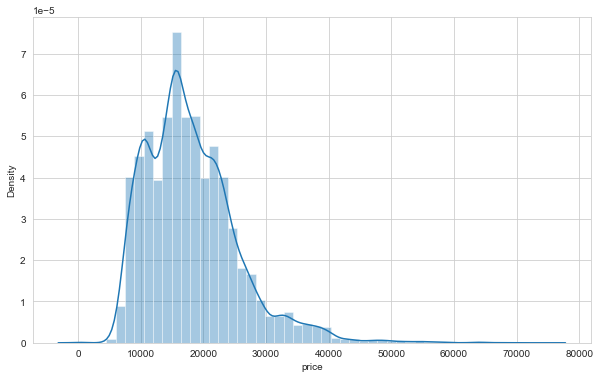

In [243]:
sns.distplot(df.price);

In [244]:
df.shape

(15919, 43)

In [245]:
df.to_csv("clean_scout.csv", index=False)

In [246]:
pd.read_csv("clean_scout.csv").head(2)

,make_model,short_description,body_type,price,vat,km,prev_owner,Type,Previous Owners,next_inspection,inspection_new,Warranty,full_service,non_smoking_vehicle,body_color,paint_type,body_color_orig,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,Extras,safety_security,description,emission_label,Gears,age,hp_kw,Type_,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,Consumption_comb,Consumption_city,Consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770.000,VAT deductible,56013.000,2.000,"Used,,Diesel (Particulate Filter)",2,"06/2021,99 g CO2/km (comb)","Yes,Euro 6",4 (Green),NaN,NaN,Black,Metallic,Mythosschwarz,5.000,5.000,Automatic,3.000,front,Diesel,99.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","Sicherheit:, ,Deaktivierung für Beifahrer-Airb...",NaN,NaN,3.000,66.000,Used,NaN,Cloth,Black,1422.000,1220.000,3.800,3.500,3.500
1,Audi A1,1.8 TFSI sport,Sedans,14500.000,Price negotiable,80000.000,NaN,"Used,,Gasoline",NaN,NaN,NaN,NaN,NaN,NaN,Red,NaN,NaN,3.000,4.000,Automatic,4.000,front,Benzine,129.000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Langstreckenfahrzeug daher die hohe Kilometerl...,4 (Green),7.000,2.000,141.000,Used,NaN,Cloth,Grey,1798.000,1255.000,5.600,4.700,4.700
